# Hyperanimator

hypertiling offers a simple API to animate hyperbolic tilings using the FuncAnimation feature of matplotlib. The hyperanimator class is a wrapper which simplifies the associated syntax and let's you realize simple animation with very little effort

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cmap

In [2]:
from hypertiling import HyperbolicTiling
from hypertiling.graphics.plot import convert_polygons_to_patches

enable interactive plot in notebook

In [3]:
%matplotlib notebook

define a function which takes one configuration to the next. In this case we implement a simple Ising model

In [4]:
J = 1 # coupling constant (positiv: ferromagnet, negativ: antiferromagnet)    

def step(state, beta):
    
    for i in range(len(state)):

        site = np.random.choice(len(state))
        
        nbrhood = 0
        for n in nbrs[site]:
            nbrhood += state[n]
            
        phi_old = state[site]
        phi_new = -state[site]
        E1 = -J*phi_old*nbrhood
        E2 = -J*phi_new*nbrhood
        dE = E2-E1
        
        if dE < 0:
            state[site] = phi_new
        elif np.random.rand() < np.exp(-beta*dE):
            state[site] = phi_new
            
    return state

construct the tiling and generate an initial state for the model

In [5]:
T = HyperbolicTiling(3, 7, 6)
nbrs = T.get_nbrs_list()

colors = 2*np.random.choice(2, len(T))-1

## Live Animation

In [6]:
# import hyperanimator class
from hypertiling.graphics.animation import AnimatorLive

<IPython.core.display.Javascript object>


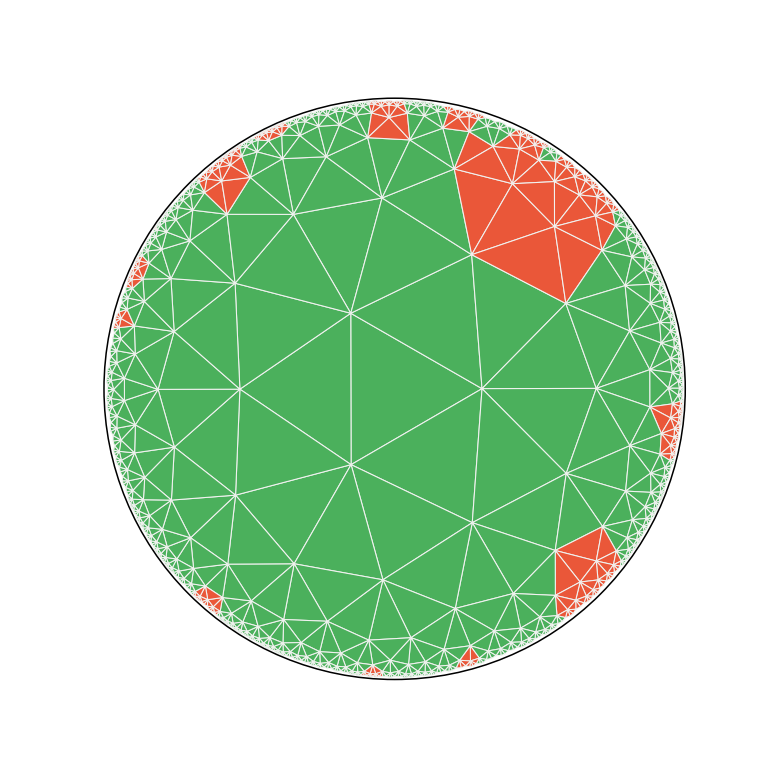

In [7]:
# create figure
fig, axs = plt.subplots(1,1,figsize=(7,7))

# plot tiling using built in function "poly2patch"
patchkwargs = {"cmap": cmap.RdYlGn, "edgecolor": "#f1f2f0ff", "lw": 0.7, "clim":[-1.5,1.5]}
pgons = convert_polygons_to_patches(T, colors, **patchkwargs)
axs.add_collection(pgons)

# ------- this is the animation part -------
# note: the argument "frames" is only relevant for saving the animation, in the
# live plot it will run forever (i.e. until manually stopped)

# extra arguments to the step functions; leave away if there are none
stepargs = {"beta": 2}
# arguments to be passed through to the matplotlib FuncAnimator
animargs = {"frames": 300, "interval": 5, "blit": True}
# the actual animator
ani = AnimatorLive(colors, fig, pgons, step, stepargs, animargs)
# -------


# some usual plot adjustments
axs.add_patch(plt.Circle((0.0, 0.0), radius=1, edgecolor='k', facecolor='None', zorder=7))
axs.set_xlim(-1.02,1.02)
axs.set_ylim(-1.02,1.02)
axs.axis("off"); axs.set_aspect('equal'); plt.show()

hyperanimations can be easily saved like this

In [11]:
ani.save("/home/user/anim.mp4", fps=10, codec="libx264")

## List Animation

In [8]:
from hypertiling.graphics.animation import AnimatorList

Pre-compute some data and store it in 2D array-like container. Here we use our Ising model, but of course data can come from anywhere

In [9]:
# first dimension: max number of frames, second dimension: len(tiling)
colors_list = np.zeros((100,len(T))) 

for i in range(100):
    colors_list[i] = step(colors, beta=0.1)

<IPython.core.display.Javascript object>


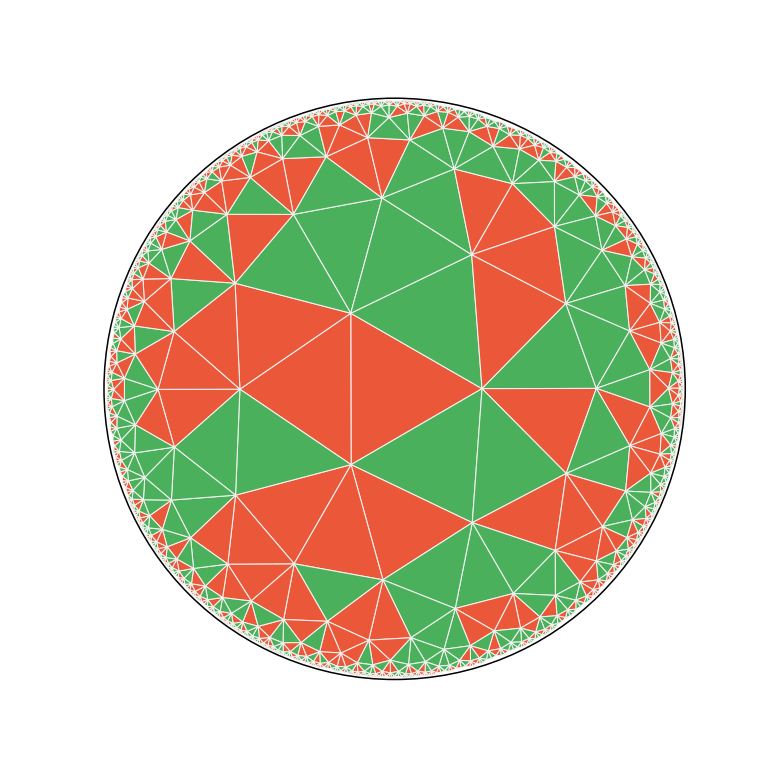

In [10]:
# create figure
fig, axs = plt.subplots(1,1,figsize=(7,7))

# plot tiling using built in function "poly2patch"
patchkwargs = {"cmap": cmap.RdYlGn, "edgecolor": "#f1f2f0ff", "lw": 0.7, "clim":[-1.5,1.5]}
pgons = convert_polygons_to_patches(T, colors, **patchkwargs)
axs.add_collection(pgons)

# ------- this is the animation part -------

# arguments to be passed through to the matplotlib FuncAnimator
animargs = {"interval": 200, "blit": True}

# the actual animator
ani = AnimatorList(colors_list, fig, pgons, animargs)

# ------- 

# some usual plot adjustments
axs.add_patch(plt.Circle((0.0, 0.0), radius=1, edgecolor='k', facecolor='None', zorder=7))
axs.set_xlim(-1.02,1.02)
axs.set_ylim(-1.02,1.02)
axs.axis("off"); axs.set_aspect('equal'); plt.show()

In [ ]:
ani.save("/home/user/anim.mp4", fps=10, codec="libx264")

## Path Animation

With `AnimatorPath` you can parse a predefined path which the camera will track throughout the animation. Here we will demonstrate how walking in a circle on a hyperbolic disk we accumulate rotation. 

In [11]:
from hypertiling.graphics.plot import plot_tiling
from hypertiling.graphics.animation import AnimatorPath

In [12]:
T = HyperbolicTiling(4, 5, 3)
T.rotate(-np.pi/4)

<IPython.core.display.Javascript object>


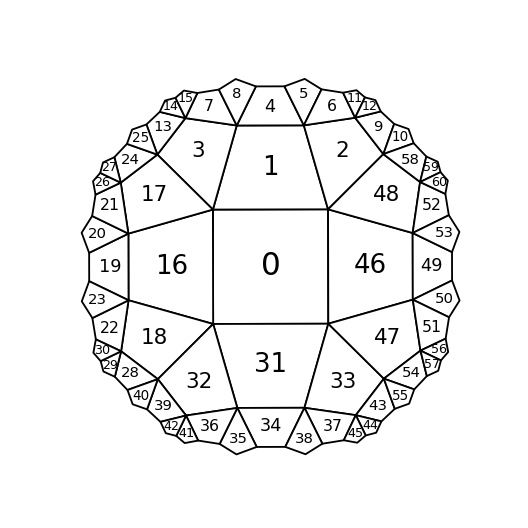

In [13]:
plot_tiling(T)

for poly in T.polygons:
    x, y = poly.get_center().real, poly.get_center().imag
    plt.text(x, y, f"{poly.idx}", ha="center", va="center", fontsize=17*(1-0.7*np.abs(x*x+y*y)))

Our path will be: 0 &rarr; 1 &rarr; 2 &rarr; 48 &rarr; 46 &rarr; 0

We paint the cells with random colors in order to make it easier to follow the movement

In [14]:
path = [0, 1, 2, 48, 46, 0]
colors = np.random.rand(len(T))

<IPython.core.display.Javascript object>


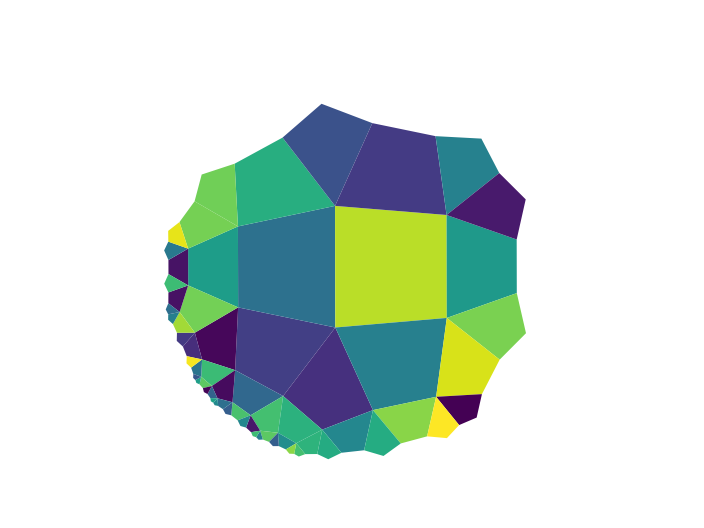

In [15]:
fig, ax = plt.subplots()
ani = AnimatorPath(colors, fig, ax, T, path)

Note that while our path returns back to central polygon, the lattice is now rotated by $\frac{\pi}{2}$ in clock-wise direction. This is due to the curvature of the space and does not happen in flat space (try it out on a piece of grid paper yourself!).

In [ ]:
ani.save("/home/user/anim.mp4", fps=60)